In [77]:
import pandas as pd
from pathlib import Path
import yfinance as yf
import numpy as np
import csv
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [105]:
df_50 = pd.read_csv(
    Path("./Data/QM_50.csv")
)

In [106]:
weighting = 1/50
weighting * a

array([       nan, 0.02080681, 0.02034029, 0.02066685, 0.02084248,
       0.02101537, 0.02117728, 0.02091658, 0.02113337, 0.02136938,
       0.02129803, 0.02108398, 0.02082327, 0.02119923, 0.02138035,
       0.02146268, 0.022264  , 0.02321899, 0.02301043, 0.02351811,
       0.02310922, 0.02270308, 0.02245609, 0.0228101 , 0.02287047,
       0.02284029, 0.02346048, 0.02398738, 0.02432492, 0.02438255,
       0.02394621, 0.02413008, 0.0235483 , 0.02345225, 0.02333974,
       0.02260977, 0.02257958, 0.02290889, 0.02391328, 0.02313941,
       0.02403129, 0.0241438 , 0.02447036, 0.02524476, 0.02530517,
       0.02501683, 0.02513217, 0.02573631, 0.02560724, 0.02582967,
       0.02581595, 0.0261647 , 0.02628003, 0.02631573, 0.02574455,
       0.02624434, 0.02634045, 0.02681277, 0.02683474, 0.02696106,
       0.02687044, 0.02711484, 0.02653817])

In [107]:
tickers = list(df_50["Tickers"])

In [117]:
historical = yf.Ticker("PWR").history(period="2y")

In [123]:
price_3month = historical.loc["2021-02":"2021-04"]
price_3month["return"] = price_3month["Close"].pct_change()
price_3month.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,return
Date,,,,,,,,
2021-02-01,71.464545,73.002491,70.376002,72.782784,1458700,0.0,0,NaN
2021-02-02,73.831386,76.687572,73.461877,75.718864,1320800,0.0,0,0.040340
2021-02-03,75.529114,75.529114,73.961208,74.021133,861300,0.0,0,-0.022422
2021-02-04,74.160946,75.329384,73.611677,75.209541,929500,0.0,0,0.016055
2021-02-05,76.038443,76.108349,74.700234,75.848694,687000,0.0,0,0.008498


In [122]:
lags = 5

In [127]:
cols = []
for lag in range(1, lags + 1):
    col = f'lag_{lag}'
    price_3month[col] = price_3month['Close'].shift(lag)
    cols.append(col)
price_3month.dropna(inplace=True)
price_3month

,Open,High,Low,Close,Volume,Dividends,Stock Splits,return,lag_1,lag_2,lag_3,lag_4,lag_5
Date,,,,,,,,,,,,,
2021-02-16,78.644956,79.443892,77.236833,77.506477,629300,0.00,0,-0.003339,77.766136,76.907280,76.118340,77.067062,76.477852
2021-02-17,77.256816,77.915931,75.918599,76.727524,604800,0.00,0,-0.010050,77.506477,77.766136,76.907280,76.118340,77.067062
2021-02-18,76.258149,76.397961,73.801431,75.778786,793900,0.00,0,-0.012365,76.727524,77.506477,77.766136,76.907280,76.118340
2021-02-19,76.497823,77.676249,76.318063,77.146957,802700,0.00,0,0.018055,75.778786,76.727524,77.506477,77.766136,76.907280
2021-02-22,77.057084,78.575053,75.958545,77.806084,1110800,0.00,0,0.008544,77.146957,75.778786,76.727524,77.506477,77.766136
2021-02-23,77.097020,78.634967,74.740167,78.105675,1217900,0.00,0,0.003850,77.806084,77.146957,75.778786,76.727524,77.506477
2021-02-24,78.575053,81.880635,78.265469,81.021782,1720500,0.00,0,0.037335,78.105675,77.806084,77.146957,75.778786,76.727524
2021-02-25,83.887960,86.114989,83.318720,84.497147,2031900,0.00,0,0.042894,81.021782,78.105675,77.806084,77.146957,75.778786
2021-02-26,84.477162,85.645607,82.539755,83.738152,1536000,0.00,0,-0.008982,84.497147,81.021782,78.105675,77.806084,77.146957


array([       nan, 0.02067511, 0.02107331, 0.0209971 , 0.02073629,
       0.02123752, 0.02147687, 0.02168831, 0.02136739, 0.02216486,
       0.02076849, 0.02032199, 0.01940968, 0.02036493, 0.01801653,
       0.01834174, 0.0194129 , 0.01796394, 0.01889664, 0.02001181,
       0.01842761, 0.01729312, 0.01608672, 0.01540732, 0.01417409,
       0.01596007, 0.01636042, 0.01774606, 0.01767844, 0.01869271,
       0.01785017, 0.01758291, 0.01593646, 0.01663089, 0.01729205,
       0.01674037, 0.01588279, 0.01593646, 0.01632178, 0.01525598,
       0.016164  , 0.01740474, 0.01746163, 0.01603735, 0.01694966,
       0.01610068, 0.01643555, 0.0162445 , 0.01630031, 0.01643125,
       0.01630461, 0.01564774, 0.01610068, 0.01514865, 0.01577761,
       0.01664484, 0.01726736, 0.01792101, 0.01853064, 0.01836428,
       0.01576795, 0.01539122, 0.0149458 ])

In [114]:
sum_ret = np.zeros(63)
for ticker in tickers:
    df_price = yf.Ticker(ticker).history(period="2y")
    df_price_3month = df_price.loc["2021-02":"2021-04"]
    df_price_3month["return"] = df_price_3month["Close"].pct_change()
    cum_ret = weighting * np.array((1 + df_price_3month["return"]).cumprod())
    sum_ret = sum_ret + cum_ret
    print(ticker, cum_ret[-1])

PWR 0.026538166216534213
TRMB 0.02421736518661824
ENPH 0.014945798297376543
IDXX 0.02229763109800747
AES 0.022548170744512454
CPRT 0.02246256565952145
TT 0.02444604079193229
FDX 0.024332540344888895
TTWO 0.017455957275998638
TEL 0.021676619404143782
XYL 0.022846181439970473
HWM 0.02551696635498839
PTC 0.019115328823562955
FCX 0.02677579527250971
NWSA 0.02715614906404981
WY 0.024324324161116656
PKI 0.01707343500899863
TWTR 0.020972275495901586
TSLA 0.01689525022335563
NWS 0.025980563663937906
CZR 0.027638415853277705
DE 0.02544466612673594
ISRG 0.023186929996451305
HON 0.02291136113795963
URI 0.025264530460285522
MS 0.024501471526833973
VIAC 0.015721161855254916
PAYC 0.01939260899613066
SIVB 0.025051147509203994
ZBRA 0.024550877442806162
ALB 0.02026828728833709
AAPL 0.01962970950367702
CAT 0.02480956295508654
TPR 0.03004709384302057
MPWR 0.019678626608870577
APTV 0.02073791092592818
EXPE 0.027687351375142874
TGT 0.022661528620731446
NTAP 0.022754188517547992
DXC 0.02581176458620561
CARR

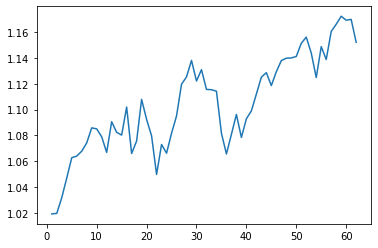

In [115]:
plt.plot(sum_ret)

In [111]:
df1_50 = pd.read_csv(
    Path("./Data/QM_50_6month.csv")
)

In [112]:
tickers = list(df1_50["Tickers"])

In [138]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [186]:
historical = yf.Ticker("enph").history(period="2y")

In [187]:
price_3month = historical.loc["2021-02":"2021-04"]
price_3month["return"] = price_3month["Close"].pct_change()
price_3month.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,return
Date,,,,,,,,
2021-02-01,185.300003,188.360001,177.350006,186.339996,2494300,0,0,NaN
2021-02-02,189.839996,194.309998,186.660004,192.630005,2178200,0,0,0.033756
2021-02-03,196.179993,197.929993,190.000000,196.339996,1693800,0,0,0.019260
2021-02-04,194.600006,197.240005,191.580002,195.630005,1531300,0,0,-0.003616
2021-02-05,196.979996,196.990005,190.500000,193.199997,1755300,0,0,-0.012421


In [188]:
lags = 5

In [189]:
cols = []
for lag in range(1, lags + 1):
    col = f'lag_{lag}'
    price_3month[col] = price_3month['Close'].shift(lag)
    cols.append(col)
price_3month.dropna(inplace=True)
price_3month

,Open,High,Low,Close,Volume,Dividends,Stock Splits,return,lag_1,lag_2,lag_3,lag_4,lag_5
Date,,,,,,,,,,,,,
2021-02-08,194.630005,203.380005,193.600006,197.869995,2114200,0,0,0.024172,193.199997,195.630005,196.339996,192.630005,186.339996
2021-02-09,197.759995,202.919998,195.699997,200.100006,2894600,0,0,0.011270,197.869995,193.199997,195.630005,196.339996,192.630005
2021-02-10,214.000000,229.039993,200.600006,202.070007,6482800,0,0,0.009845,200.100006,197.869995,193.199997,195.630005,196.339996
2021-02-11,205.550003,209.419998,197.259995,199.080002,2999100,0,0,-0.014797,202.070007,200.100006,197.869995,193.199997,195.630005
2021-02-12,196.000000,208.949997,193.660004,206.509995,2446200,0,0,0.037322,199.080002,202.070007,200.100006,197.869995,193.199997
2021-02-16,208.070007,208.410004,192.809998,193.500000,2866700,0,0,-0.062999,206.509995,199.080002,202.070007,200.100006,197.869995
2021-02-17,190.020004,191.500000,181.520004,189.339996,3650000,0,0,-0.021499,193.500000,206.509995,199.080002,202.070007,200.100006
2021-02-18,182.500000,184.000000,175.509995,180.839996,3633800,0,0,-0.044893,189.339996,193.500000,206.509995,199.080002,202.070007
2021-02-19,185.020004,194.940002,184.000000,189.740005,2486200,0,0,0.049215,180.839996,189.339996,193.500000,206.509995,199.080002


In [344]:
model = LogisticRegression(C=1e-3, solver="lbfgs",
                          multi_class="multinomial",
                          max_iter=10000)

In [345]:
model.fit(price_3month[cols],np.sign(price_3month["return"]))

LogisticRegression(C=0.001, max_iter=10000, multi_class='multinomial')

In [346]:
price_3month["prediction"] = model.predict(price_3month[cols])

In [340]:
price_3month["prediction"].value_counts()

 1.0    36
-1.0    22
Name: prediction, dtype: int64

In [341]:
print(classification_report(price_3month["prediction"],
                           np.sign(price_3month["return"])))

              precision    recall  f1-score   support

        -1.0       0.50      0.64      0.56        22
         1.0       0.73      0.61      0.67        36

    accuracy                           0.62        58
   macro avg       0.62      0.62      0.61        58
weighted avg       0.64      0.62      0.63        58



In [342]:
price_3month["strategy"] = price_3month["prediction"] * price_3month["return"]

<AxesSubplot:xlabel='Date'>

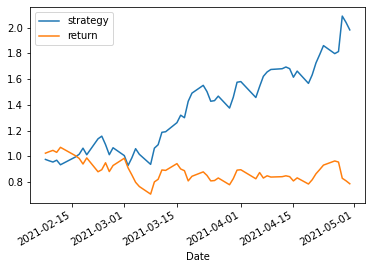

In [343]:
price_3month[["strategy","return"]].cumsum().apply(np.exp).plot()